In [34]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [26]:
# Load Dataset
df = pd.read_csv("winequality-red.csv", sep=';')


In [35]:
# 3. Preprocess Data
X = df.drop("quality", axis=1)
y = df["quality"]

In [36]:
# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# 5. Train Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
# 6. Predict
y_pred = model.predict(X_test)


In [39]:
# 7. Evaluate Model
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.3f}")
print(f"R2 Score: {r2:.3f}")

RMSE: 0.301
R2 Score: 0.539


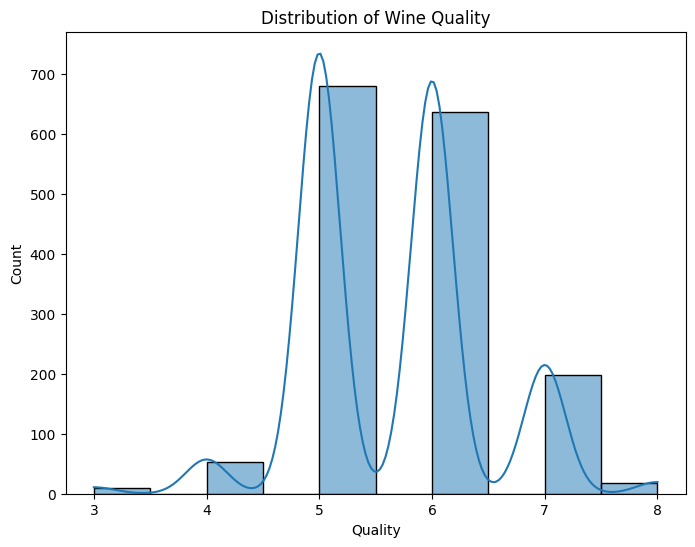

In [40]:
# 8. Plot 1: Distribution of Quality
plt.figure(figsize=(8,6))
sns.histplot(df["quality"], bins=10, kde=True)
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

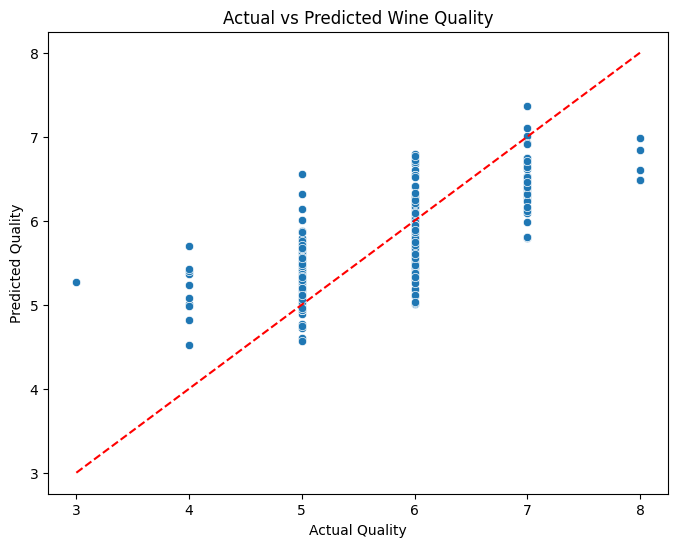

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
# 9. Plot Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.show()

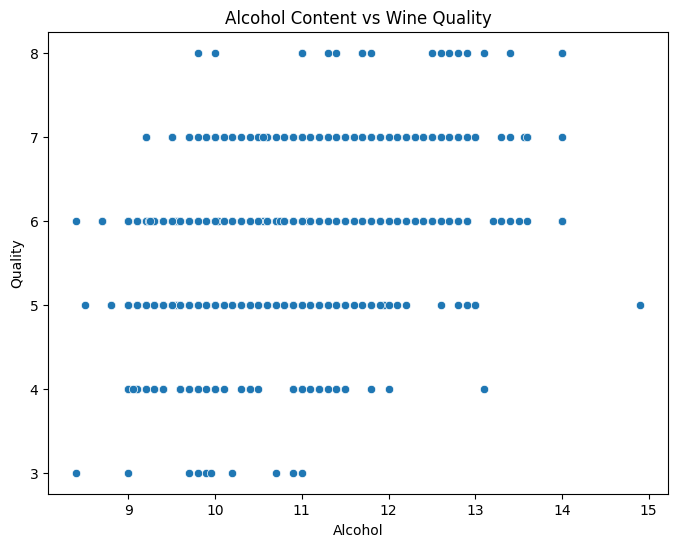

In [41]:
# 9. Plot 2: Alcohol vs Quality scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["alcohol"], y=df["quality"])
plt.title("Alcohol Content vs Wine Quality")
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.show()

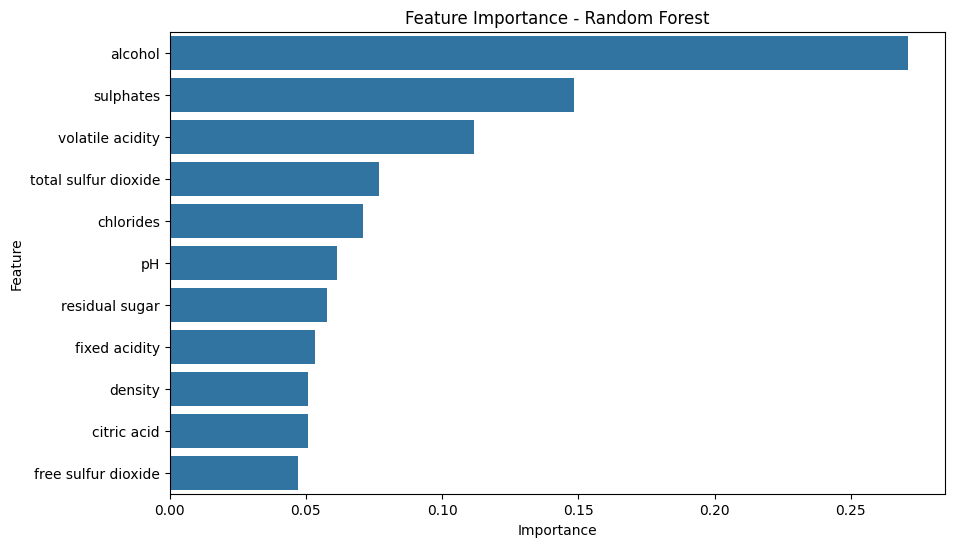

In [42]:
# 10. Plot 3: Feature Importance from Random Forest
importances = model.feature_importances_
features = X.columns
feature_imp_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_imp_df)
plt.title("Feature Importance - Random Forest")
plt.show()